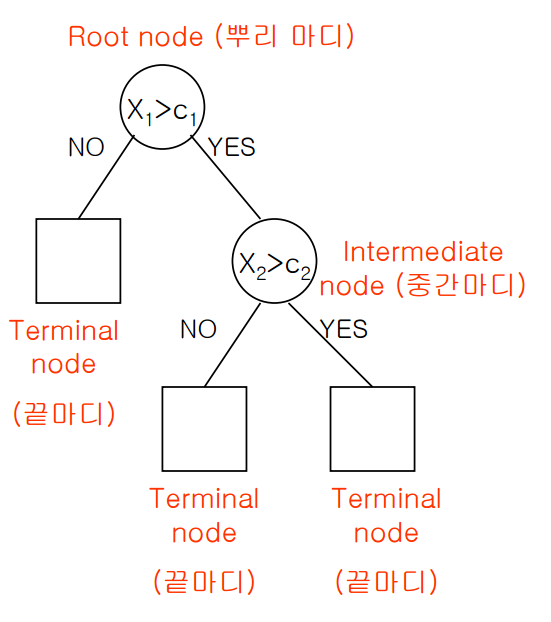

### 분류에 있어 가장 중요한 변수가 선택된다.
#### 분석 과정이 직관적이고 이해하기 쉬움
#### 연속형/범주형 변수를 모두 사용 가능
#### 분지규칙은 불순도를 최소화 

## 1. tree 형성 (Growing tree)
## 2. tree 가지치기 (pruning tree)
## 3. 최적 tree로 분류 (classification)

In [21]:
#install.packages('tree')

In [15]:
library(tree)
library(lattice)
library(ggplot2)
library(caret)

In [16]:
set.seed(12)
N <- nrow(iris)
tr.idx <- sample(1:N, N*2/3)
train <- iris[tr.idx, ]
test <- iris[-tr.idx, ]

In [17]:
treemod <- tree(Species ~., train)
treemod

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 100 219.300 setosa ( 0.36000 0.33000 0.31000 )  
   2) Petal.Length < 2.6 36   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.6 64  88.660 versicolor ( 0.00000 0.51562 0.48438 )  
     6) Petal.Width < 1.75 37  25.350 versicolor ( 0.00000 0.89189 0.10811 )  
      12) Petal.Length < 4.95 32   8.900 versicolor ( 0.00000 0.96875 0.03125 )  
        24) Sepal.Length < 5.55 8   6.028 versicolor ( 0.00000 0.87500 0.12500 ) *
        25) Sepal.Length > 5.55 24   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 5   6.730 virginica ( 0.00000 0.40000 0.60000 ) *
     7) Petal.Width > 1.75 27   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

#### tree의 결과 마디 6에서는 더이상 분지할 필요 없음

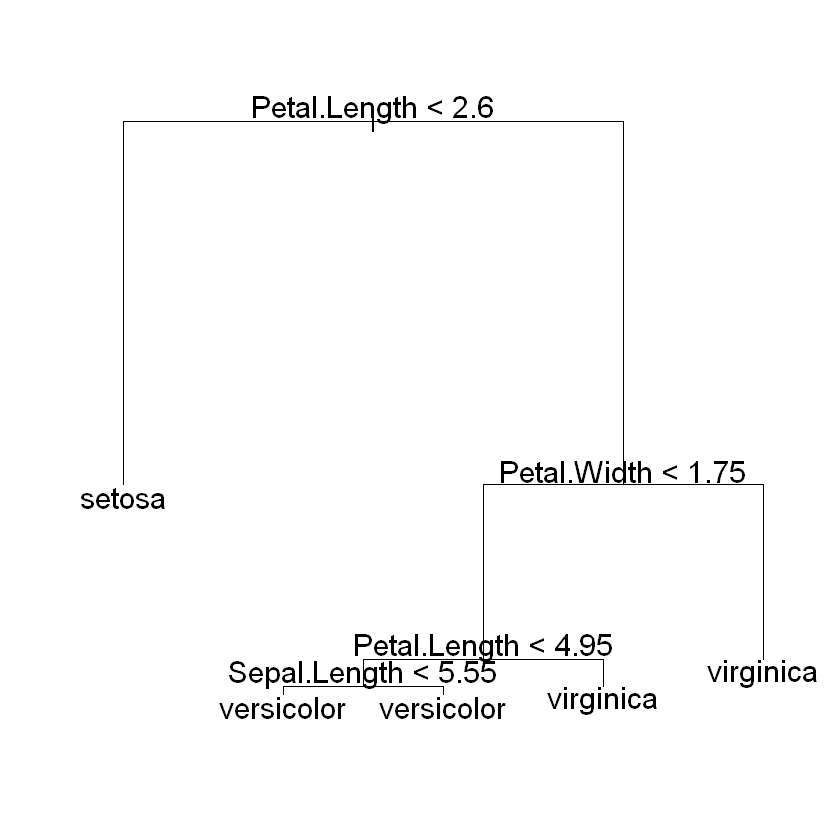

In [18]:
plot(treemod)
text(treemod, cex = 1.5)

### 가지치기(pruning) : cv.tree   (K-fold Cross-validation 방법 사용)

In [19]:
cv.tr <- cv.tree(treemod, FUN=prune.misclass)
cv.tr

$size
[1] 5 4 3 2 1

$dev
[1]  7  7  7 41 64

$k
[1] -Inf    0    1   27   33

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

#### k는 복잡도계수 (k가 최소화 되는 노드를 최적터미널노드라고 함)
#### k=1일때 최소이므로 size에서 최적터미널노드의 수는 4이다.

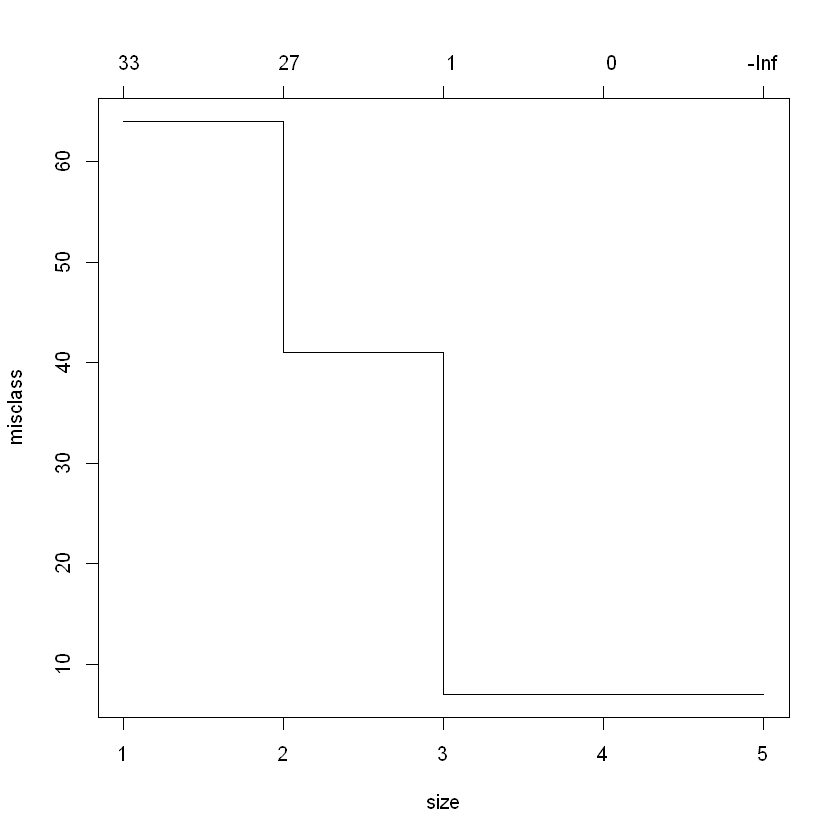

In [20]:
plot(cv.tr)

#### 그림에서 최적터미널노드의 수는 3이다.
# Q 그림하고 결과가 다르면 노드의 수는 뭘로 판단하나?

In [24]:
?cv.tree

In [25]:
?prune.misclass

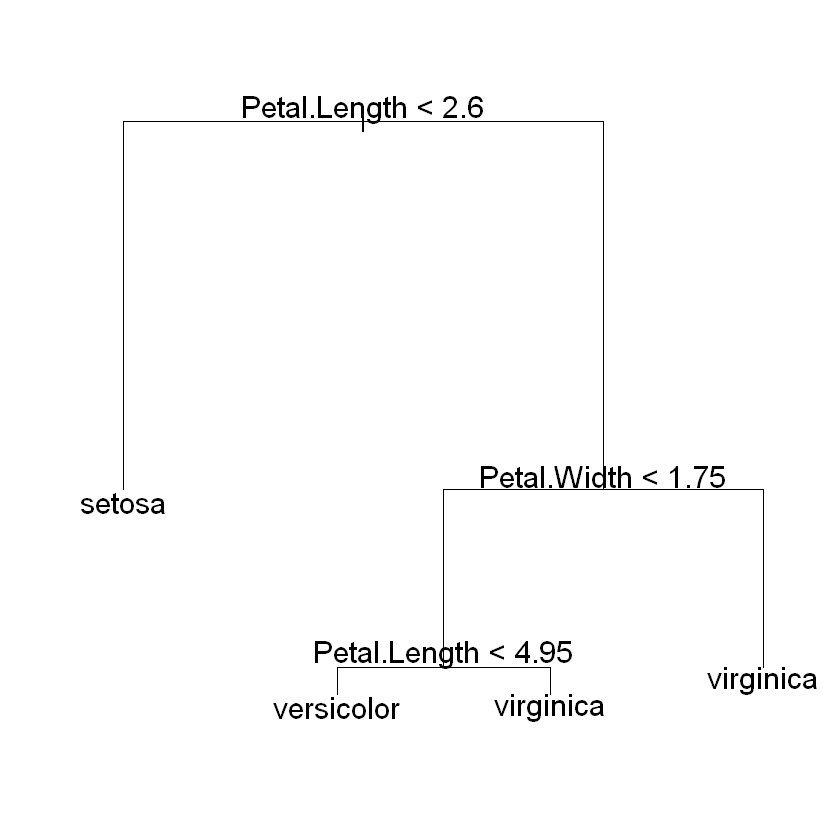

In [28]:
prune.tr <- prune.misclass(treemod, best = 4)
plot(prune.tr)
text(prune.tr, cex=1.5)

In [31]:
treepred <- predict(prune.tr, test, type ='class')
confusionMatrix(treepred, test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         0
  virginica       0          1        19

Overall Statistics
                                          
               Accuracy : 0.98            
                 95% CI : (0.8935, 0.9995)
    No Information Rate : 0.38            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9697          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.9412           1.0000
Specificity                   1.00            1.0000           0.9677
Pos Pred Value                1.00            1.0000           0.9500
Neg Pred Value                1.00            0.9706           1.0000
Prevalence                    0.28          

#### 오분류율 2%